# **Rice Seed Dataset ( Gonen & Jasmine )**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Details of the columns:

1. **id:** A unique identifier for each record in the dataset.

2. **Area:** The area of the shape.
```
The area is derived from a 2D image, so it would represent the seed’s surface area in pixels
(https://github.com/Code-with-Palak/Rice-Seed-Identification)
```

3. **MajorAxisLength:** The length of the major axis of the shape.

4. **MinorAxisLength:** The length of the minor axis of the shape.

5. **Eccentricity:** A measure of how elongated the shape is.

6. **ConvexArea:** The area of the smallest convex polygon that can contain the shape.
The area of the smallest convex shape (convex hull) that can completely enclose the seed. A convex shape has no inward curves, so the convex hull "wraps around" any gaps or indentations in the seed's actual shape.

7. **EquivDiameter:** The diameter of a circle with the same area as the shape.

8. **Extent:** The ratio of the area of the shape to the area of the bounding box.

9. **Perimeter:** The perimeter (the total length of the boundary) of the shape.

10. **Roundness:** A measure of how close the shape is to a perfect circle.

11. **AspectRatio:** The ratio of the length of the major axis to the length of the minor axis.

12. **Class:** The class or category to which the shape belongs.
```
Class 0: Refers to the Gonen rice variety.
Class 1: Refers to the Jasmine rice variety.
```


***
* Area, MajorAxisLength, MinorAxisLength, and Aspect Ratio are critical for size and shape.
* Eccentricity, Roundness, and Perimeter are important for the geometrical properties of the seed.
* ConvexArea, EquivDiameter, and Extent provide information about the seed's overall form and containment, useful for more nuanced shape analysis.


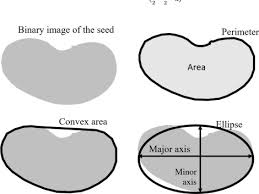

***
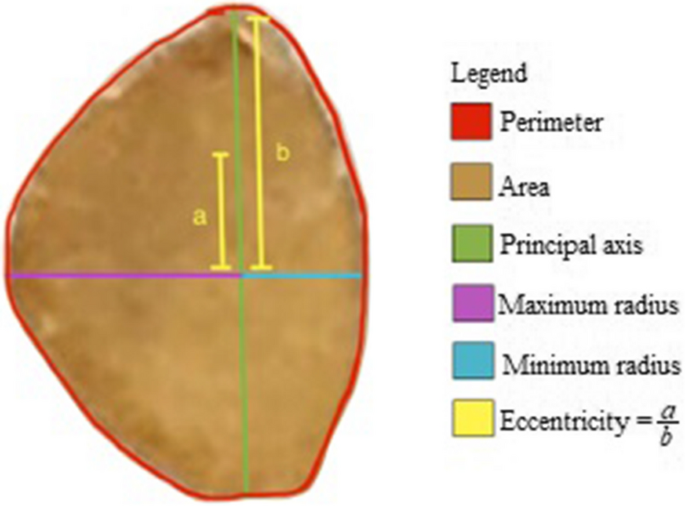



***
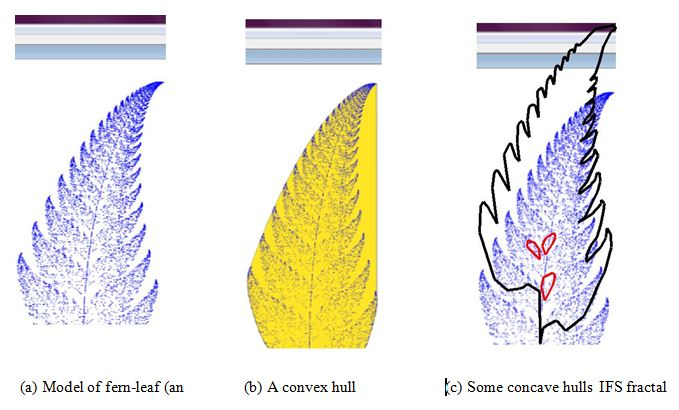

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Science - GT/Machine Learning/EDA -- Practise/Datasets/riceClassification.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [ ]:
df.tail(10)

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
18175,18176,9101,183.211434,65.025256,0.934897,9431,107.646426,0.474505,414.047,0.667113,2.817543,0
18176,18177,7595,166.372864,59.045507,0.934905,7734,98.337451,0.482406,371.322,0.692207,2.817706,0
18177,18178,5865,146.173653,51.619196,0.935572,6011,86.414987,0.550188,326.864,0.689833,2.831769,0
18178,18179,6165,149.401504,52.686933,0.935754,6295,88.597527,0.659782,339.234,0.673200,2.835646,0
18179,18180,5757,146.505031,50.650032,0.938337,5859,85.615653,0.475785,326.511,0.678595,2.892496,0
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0
18184,18185,6134,153.081981,51.590606,0.941500,6283,88.374495,0.489975,338.613,0.672274,2.967245,0


In [ ]:
df.sample(10)

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
1402,1403,5388,136.958624,51.259097,0.927321,5529,82.826413,0.534524,314.706,0.683640,2.671889,1
16059,16060,8167,154.866152,68.149848,0.897970,8329,101.973268,0.790151,366.046,0.765951,2.272436,0
7691,7692,5326,146.002519,47.244392,0.946199,5421,82.348490,0.864610,314.836,0.675215,3.090367,1
14026,14027,9461,163.525958,74.309003,0.890789,9658,109.754815,0.597059,389.092,0.785312,2.200621,0
14789,14790,8534,156.566139,70.328561,0.893434,8806,104.239274,0.792828,378.526,0.748464,2.226210,0
15973,15974,8173,155.167485,68.393602,0.897619,8423,102.010719,0.604333,369.223,0.753380,2.268743,0
6772,6773,5192,142.714715,47.060164,0.944068,5325,81.305964,0.569798,318.220,0.644302,3.032601,1
3136,3137,5828,146.076376,51.914493,0.934717,5974,86.141976,0.478961,329.342,0.675204,2.813788,1
6461,6462,6702,161.565886,53.609838,0.943345,6868,92.375600,0.465449,360.702,0.647317,3.013736,1
10377,10378,7728,144.247896,69.735354,0.875377,7997,99.194734,0.622824,361.267,0.744081,2.068505,0


* we can drop Id as its not that important for us!
***


In [ ]:
df.shape

(18185, 12)

In [ ]:
df.size

218220

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


The Dataset has no Null values
***

In [ ]:
df.drop("id", axis =1,inplace = True)
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


## **Detecting Outliers in Dataset**

In [ ]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

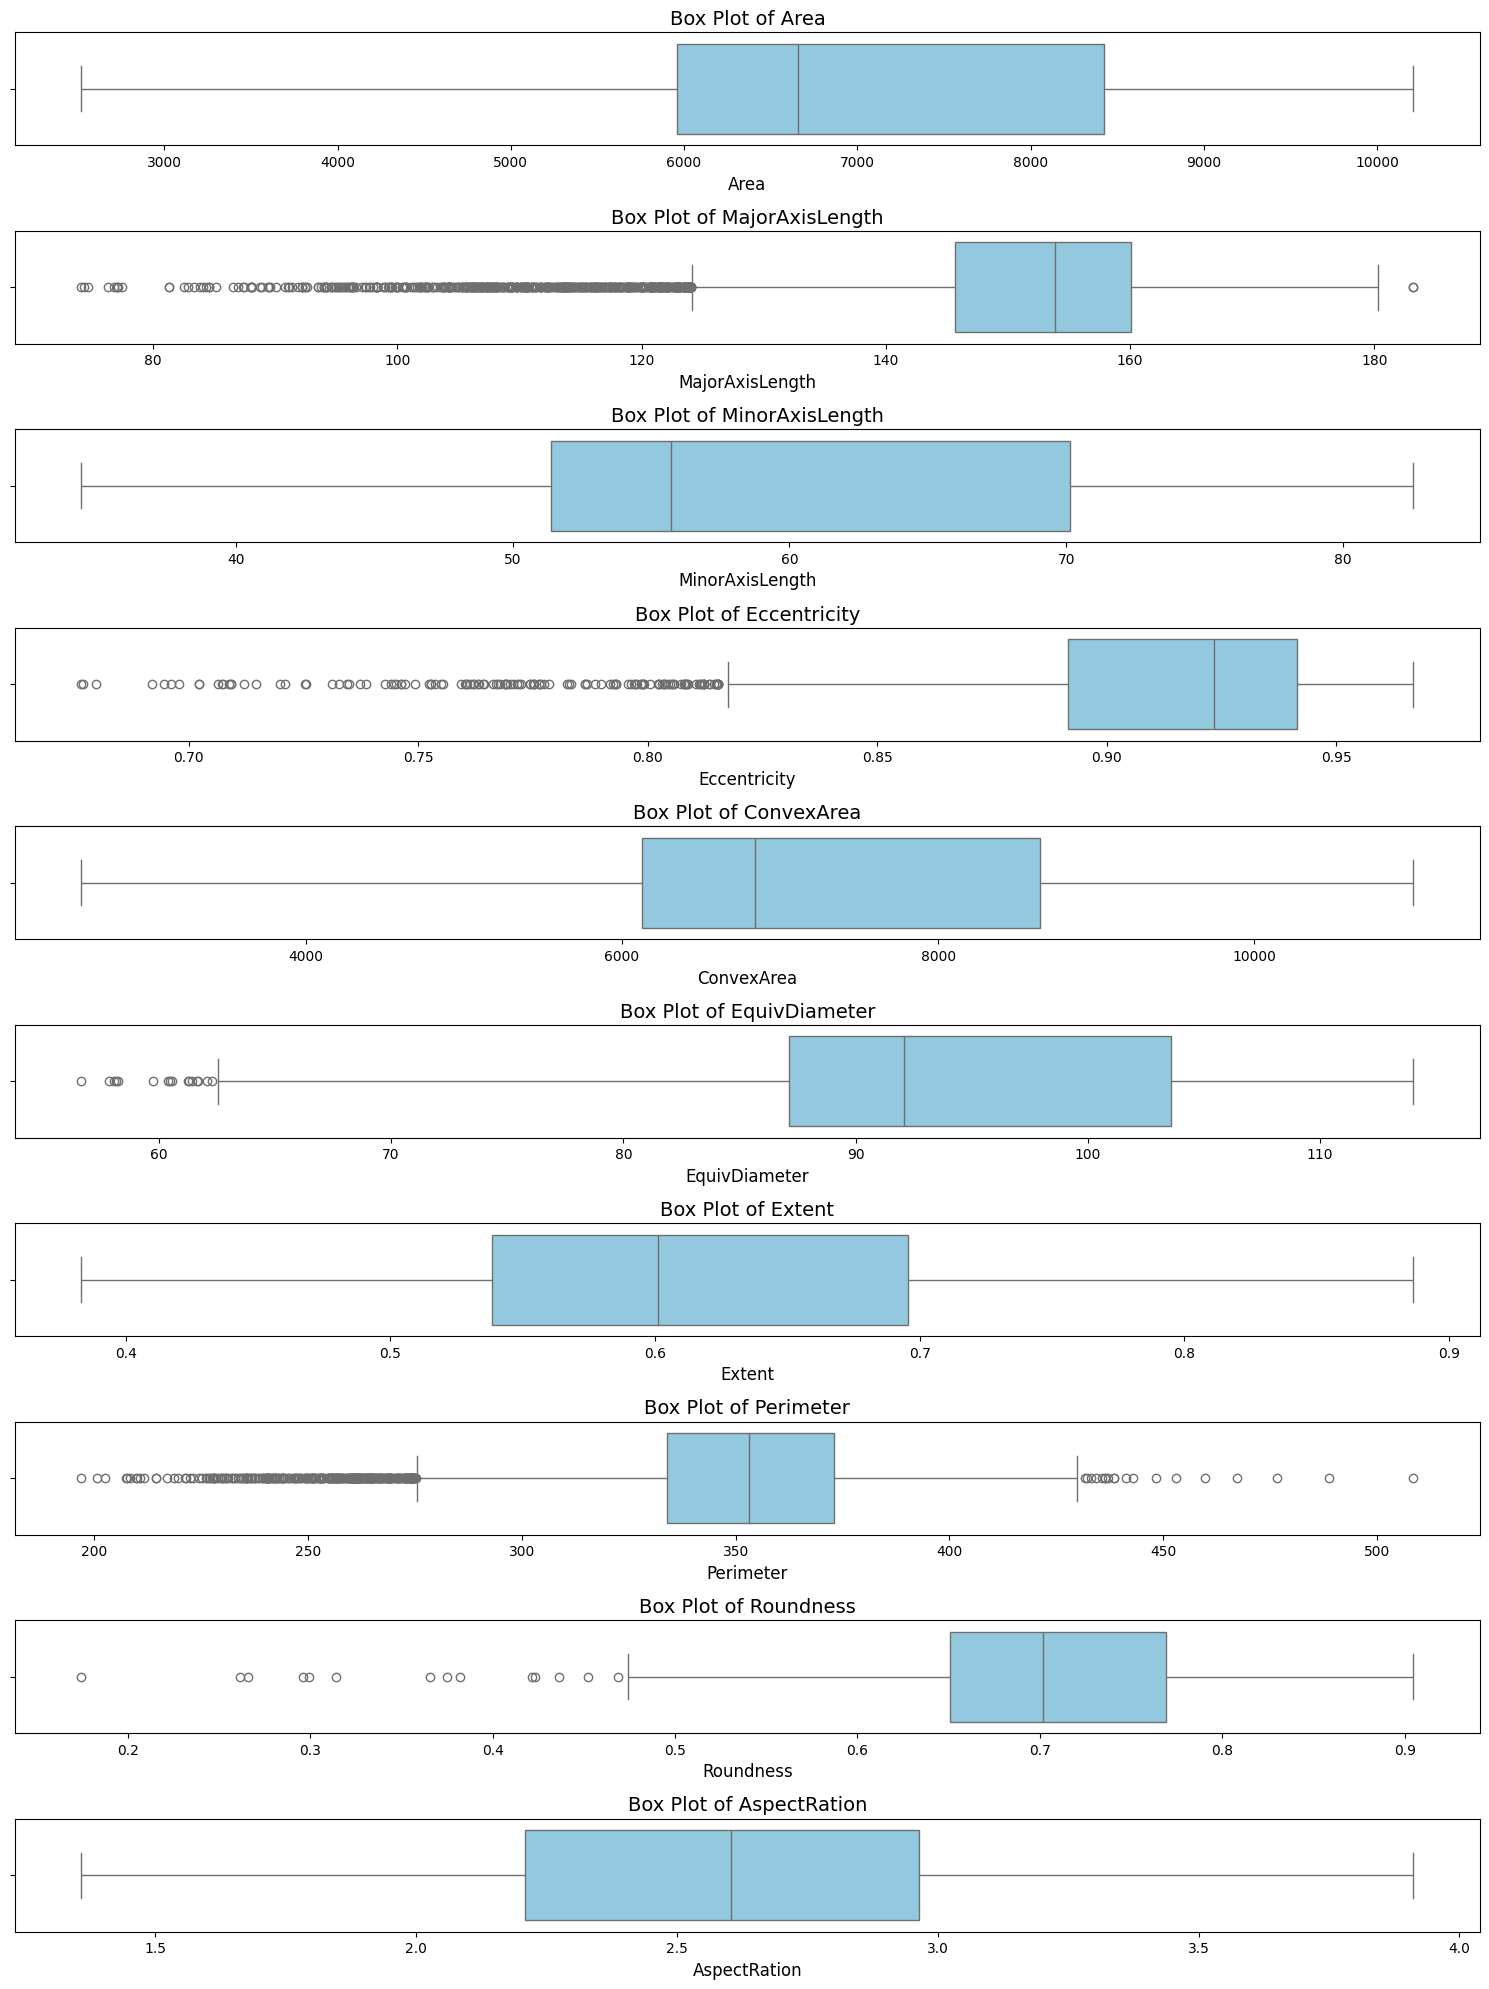

In [ ]:
def visualize_box_plots(df, column_list):
    # Set the size of the plot
    plt.figure(figsize=(15, len(column_list) *2))

    # Loop through each column in the list
    for i, column in enumerate(column_list):
        plt.subplot(len(column_list), 1, i + 1)  # Create subplots for each column
        sns.boxplot(x=df[column], color='skyblue')  # Create a boxplot for the current column
        plt.title(f'Box Plot of {column}', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.tight_layout()  # Ensure that subplots are neatly arranged

    # Show the plots
    plt.show()


# Example usage:
column_list = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation']
visualize_box_plots(df, column_list)

The typical ranges for 'Perimeter' and 'Roundness' in Gonen and Jasmine rice varieties can vary based on specific studies and datasets. However, based on available research:

1. **Perimeter**:
   - **Gonen**: The perimeter values for Gonen rice seeds generally range from approximately 200 to 500 units.
   - **Jasmine**: Jasmine rice seeds typically have perimeter values ranging from about 150 to 450 units.

2. **Roundness**:
   - **Gonen**: The roundness values for Gonen rice seeds usually fall between 0.3 and 0.8.
   - **Jasmine**: Jasmine rice seeds often have roundness values ranging from 0.2 to 0.7¹².

* IRJET - Application of Big Data Tools for Seed Classification
* Academia.edu - IRJET- Application of Big Data Tools for Seed Classification

Source: Conversation with Copilot, 15/9/2024
* (1) Application of Big Data Tools for Seed Classification - IRJET. https://www.irjet.net/archives/V8/i1/IRJET-V8I1182.pdf.
* (2) IRJET- Application of Big Data Tools for Seed Classification - Academia.edu. https://www.academia.edu/44951592/IRJET_Application_of_Big_Data_Tools_for_Seed_Classification.
* (3) EVALUATION OF DIFFERENT RICE VARIETIES FOR GROWTH AND YIELD. http://www.thejaps.org.pk/docs/v-24-5/30.pdf.

### **Removing Outliers of Seeds with less EquivDiameter**

* As the Seeds with Irregular/Abnormal shape/structure falls under the zone these outliers can effect model performance

Shape after handling outliers:  (18185, 11)


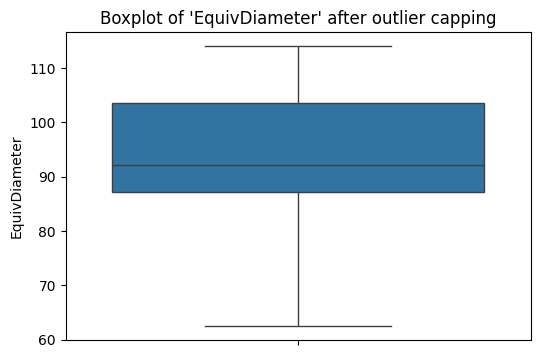

In [ ]:
Q1 = df['EquivDiameter'].quantile(0.25)  # 25th percentile
Q3 = df['EquivDiameter'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# 2. Defining the Lower and Upper Limits for Outliers
lower_limit = Q1 - (1.5 * IQR)  # Lower limit for outliers
upper_limit = Q3 + (1.5 * IQR)  # Upper limit for outliers

# 3. Capping the Outliers
df2 = df.copy()  # Create a copy of the original DataFrame

# Cap values below the lower limit to the lower limit
df2['EquivDiameter'] = np.where(df2['EquivDiameter'] < lower_limit, lower_limit, df2['EquivDiameter'])

# Cap values above the upper limit to the upper limit
df2['EquivDiameter'] = np.where(df2['EquivDiameter'] > upper_limit, upper_limit, df2['EquivDiameter'])

# 4. Print the new shape of the DataFrame
print("Shape after handling outliers: ", df2.shape)

# 5. Plotting the Boxplot to visualize the 'EquivDiameter' column after outlier handling
fig, axes = plt.subplots(1, 1, figsize=(6, 4))  # Adjust figure size
sns.boxplot(df2['EquivDiameter'], orient='v', ax=axes)
axes.set_title("Boxplot of 'EquivDiameter' after outlier capping")
plt.show()

df['EquivDiameter'] =df2['EquivDiameter']

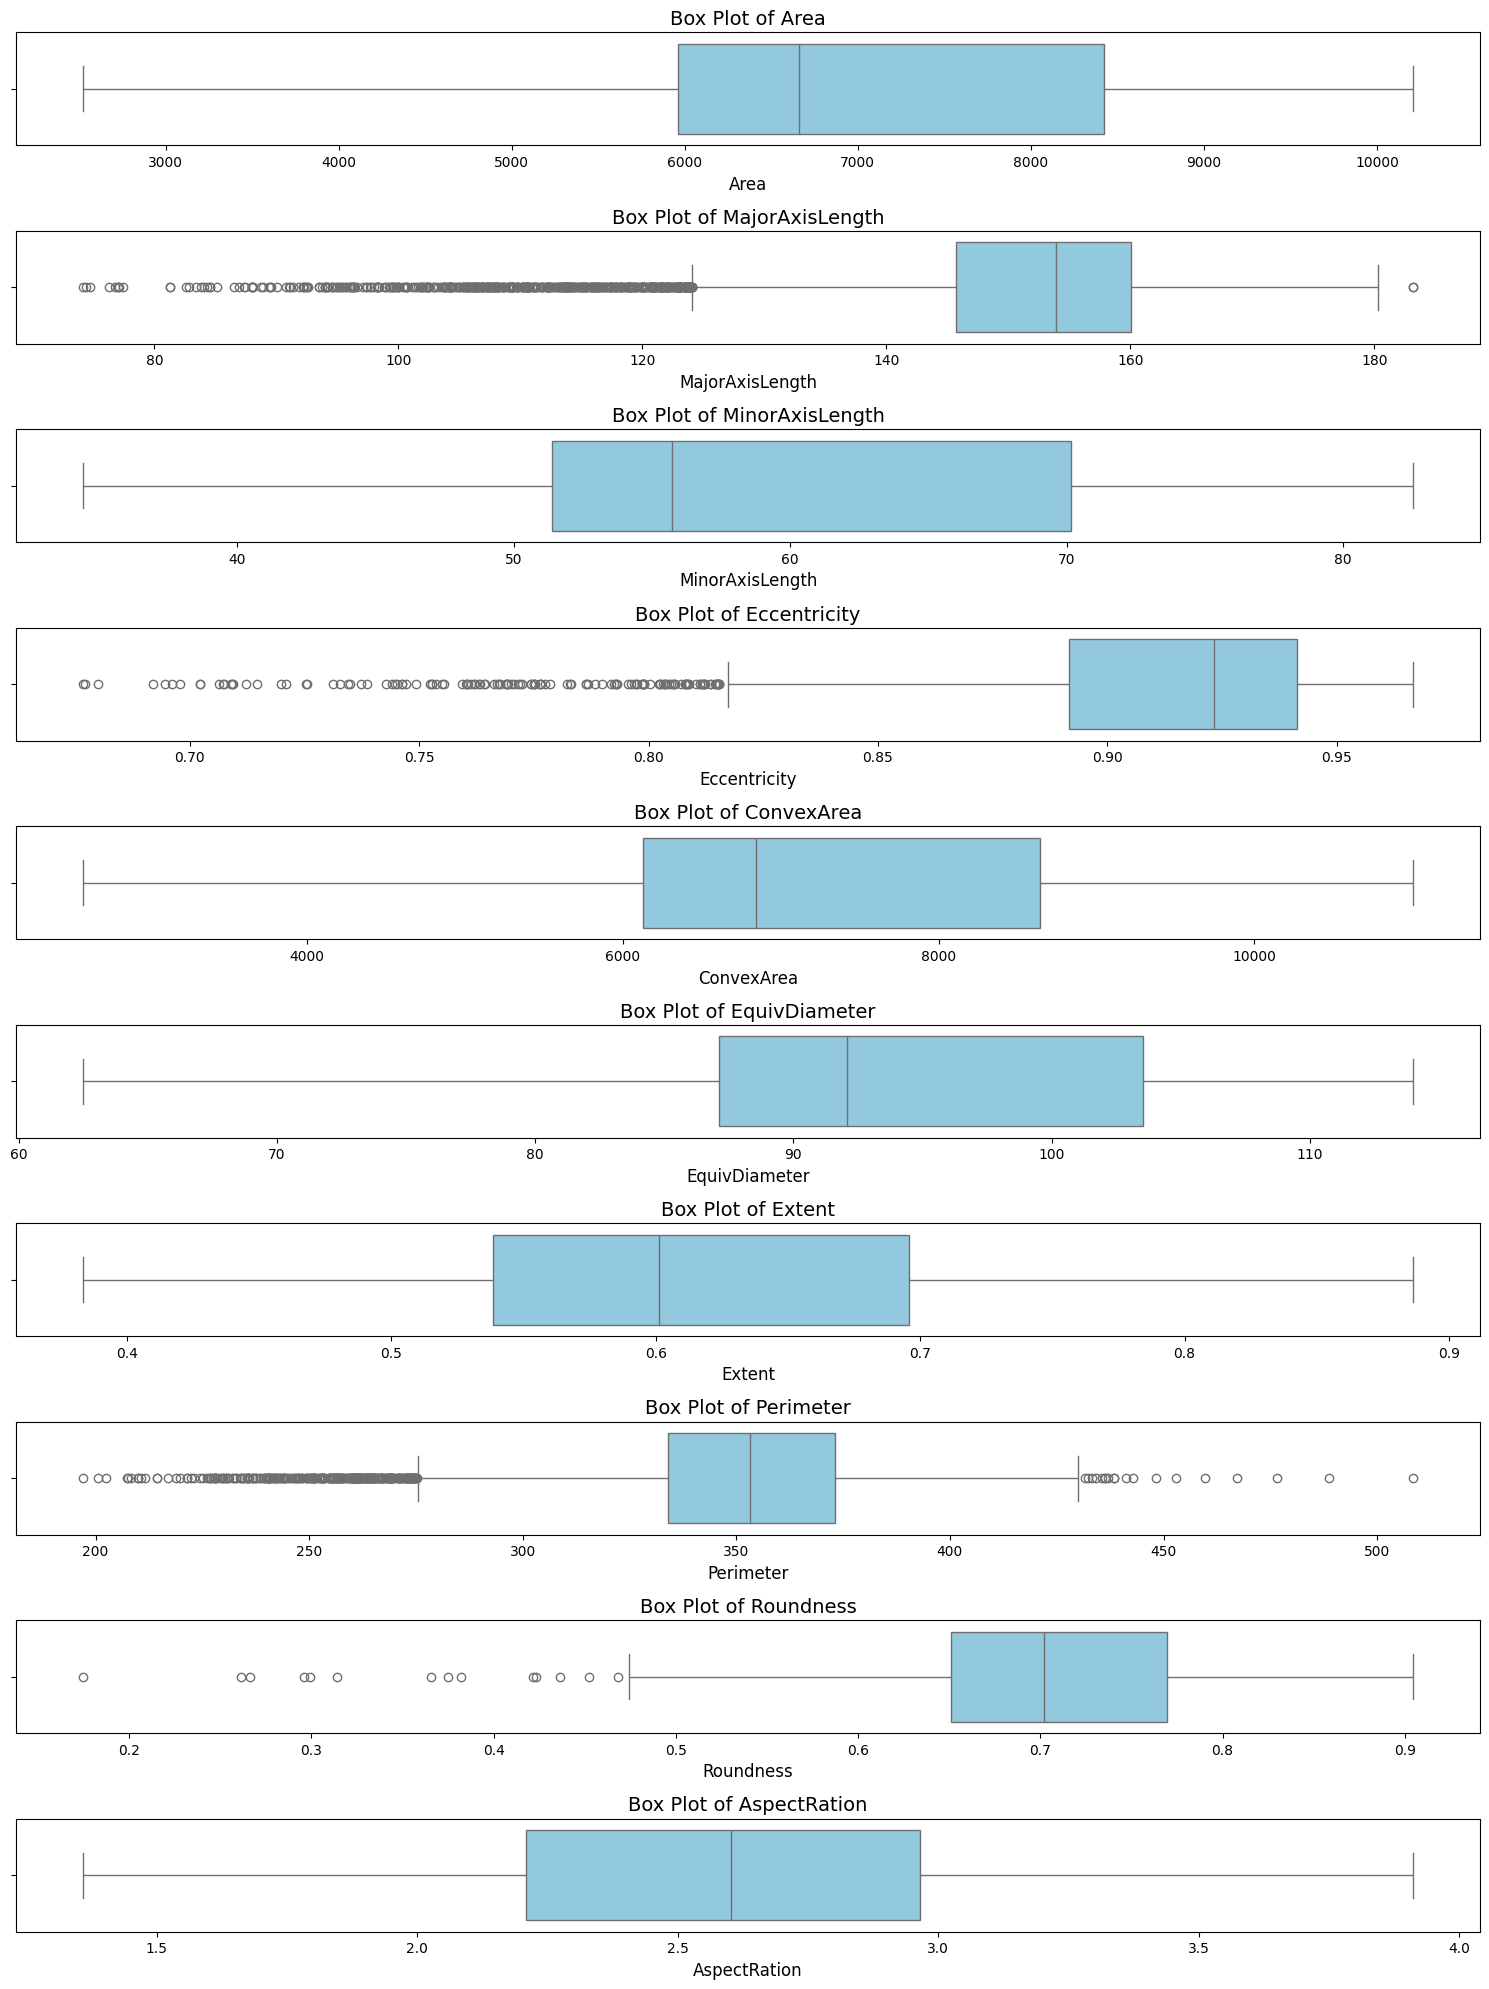

In [ ]:
def visualize_box_plots(df, column_list):
    # Set the size of the plot
    plt.figure(figsize=(15, len(column_list) *2))

    # Loop through each column in the list
    for i, column in enumerate(column_list):
        plt.subplot(len(column_list), 1, i + 1)  # Create subplots for each column
        sns.boxplot(x=df[column], color='skyblue')  # Create a boxplot for the current column
        plt.title(f'Box Plot of {column}', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.tight_layout()  # Ensure that subplots are neatly arranged

    # Show the plots
    plt.show()


# Example usage:
column_list = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation']
visualize_box_plots(df, column_list)

### **Outliers of EquivDiameter is removed rest all outliers are actually true values not a human input error**

In [ ]:
df.sample(4)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
12410,7247,141.677105,66.016906,0.884802,7386,96.058144,0.714835,339.416,0.790503,2.146073,0
15589,8781,159.814419,70.912518,0.896167,8968,105.737015,0.620346,379.114,0.767740,2.253684,0
14734,7362,145.673566,65.490308,0.893246,7493,96.817300,0.627621,346.355,0.771192,2.224353,0
10257,8875,153.792652,74.513917,0.874786,9139,106.301463,0.590525,376.429,0.787068,2.063945,0


## **Data Visualization**

* Area, MajorAxisLength, MinorAxisLength, and Aspect Ratio are critical for size and shape.
* Eccentricity, Roundness, and Perimeter are important for the geometrical properties of the seed.
* ConvexArea, EquivDiameter, and Extent provide information about the seed's overall form and containment, useful for more nuanced shape analysis.

## **Univariate**

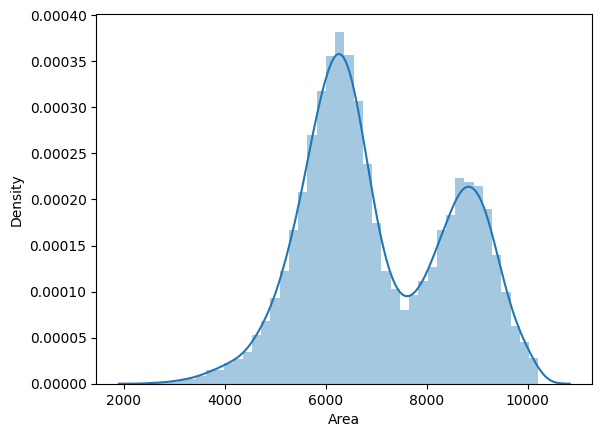

In [ ]:
sns.distplot(df['Area'])
plt.show()

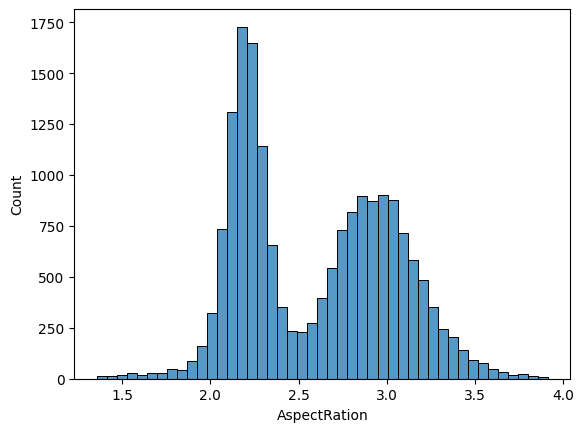

In [ ]:
sns.histplot(x=df['AspectRation'])
plt.show()

## **Bivariate Analysis**

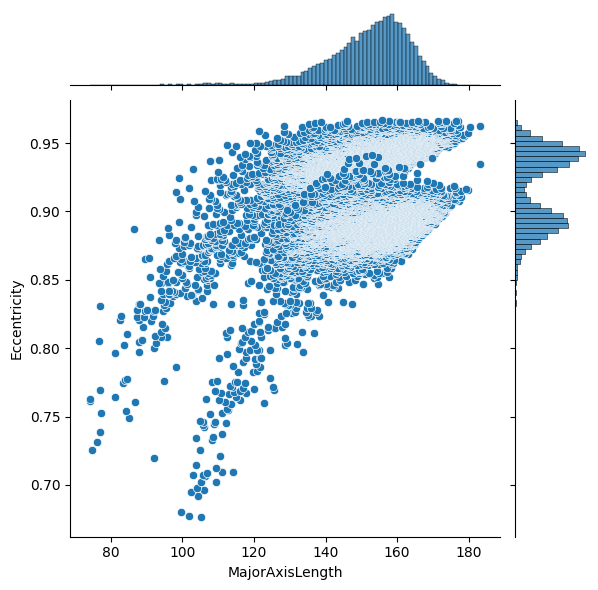

In [ ]:
sns.jointplot(x='MajorAxisLength', y='Eccentricity', data=df, palette="mako",)
plt.show()

* As the ‘MajorAxisLength’ increases, the ‘Eccentricity’ tends to increase as well. This suggests that longer rice seeds tend to be more elongated (higher eccentricity).
***

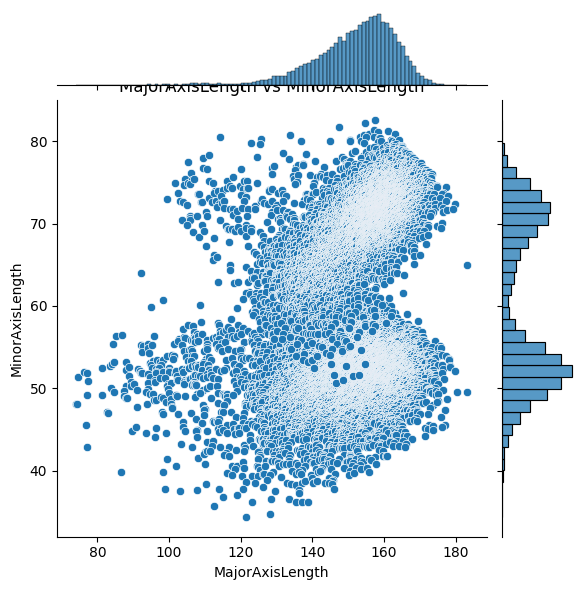

In [ ]:
sns.jointplot(x='MajorAxisLength', y='MinorAxisLength', data=df)
plt.title("MajorAxisLength vs MinorAxisLength")
plt.show()

* Minoraxislength have two Curves it defines Horizontal width of two breeds (Jasmine or Gonene)
* Majoraxislength has one Curve that defines Two Gene's rice are Long enough Majorily same
* we can predict the Rice seed based on the seed's width

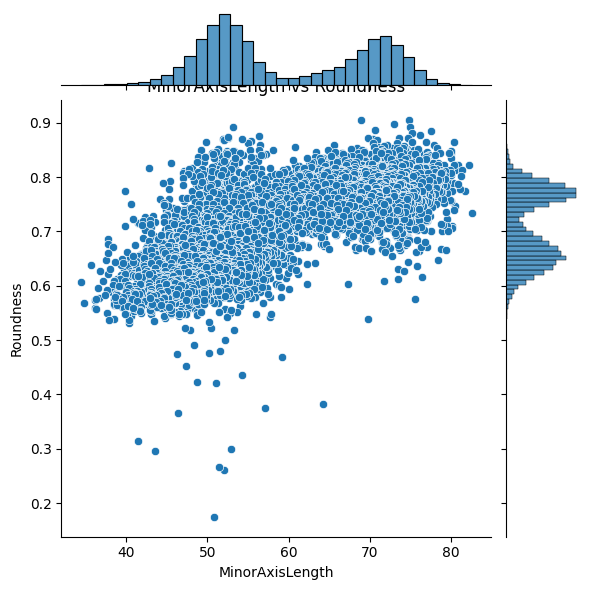

In [ ]:
sns.jointplot(x='MinorAxisLength', y='Roundness', data=df)
plt.title("MinorAxisLength vs Roundness")
plt.show()

* so from this Curve we can clearly say that one Gene Seed has more Roundness so the minoraxis is also high in that gene seed

***

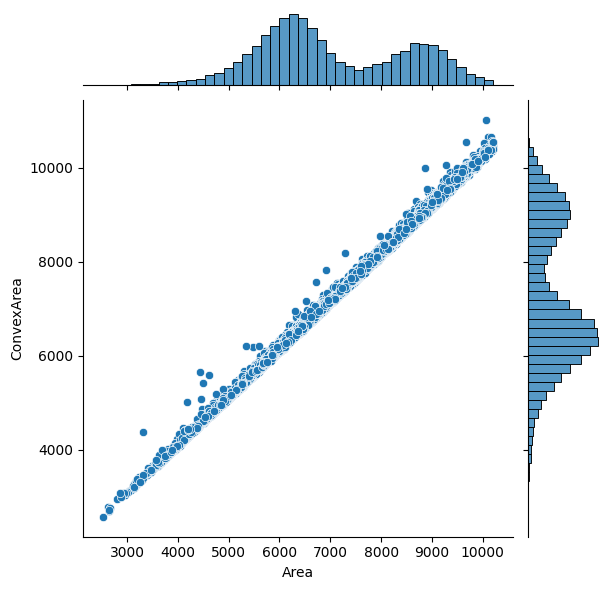

In [ ]:
sns.jointplot(x='Area', y='ConvexArea', data=df)
plt.show()

* Area & Convexarea is majorily Linear  
* Seeds with Irregular shapes have high ConvexArea
***

### **Bivariate Analysis With Target Column**

* Area, MajorAxisLength, MinorAxisLength, and Aspect Ratio are critical for size and shape.
* Eccentricity, Roundness, and Perimeter are important for the geometrical properties of the seed.
* ConvexArea, EquivDiameter, and Extent provide information about the seed's overall form and containment, useful for more nuanced shape analysis.

In [ ]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

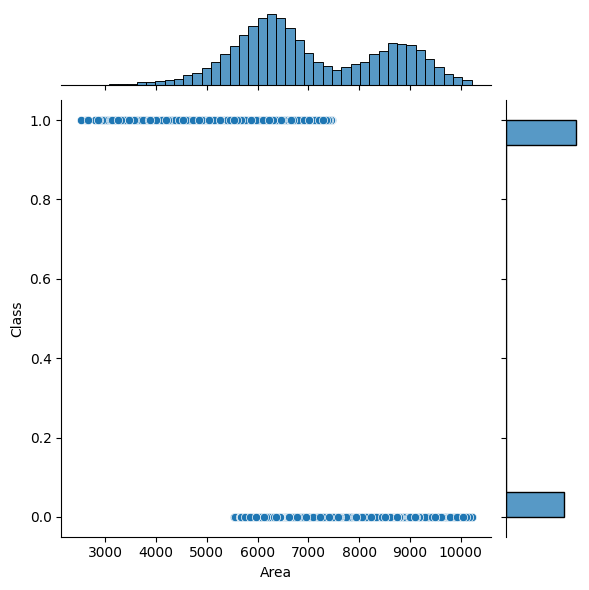

In [ ]:
sns.jointplot(x='Area', y='Class', data=df)
plt.show()

* Area of Jasmine & Gonene seed is clearly differable
***

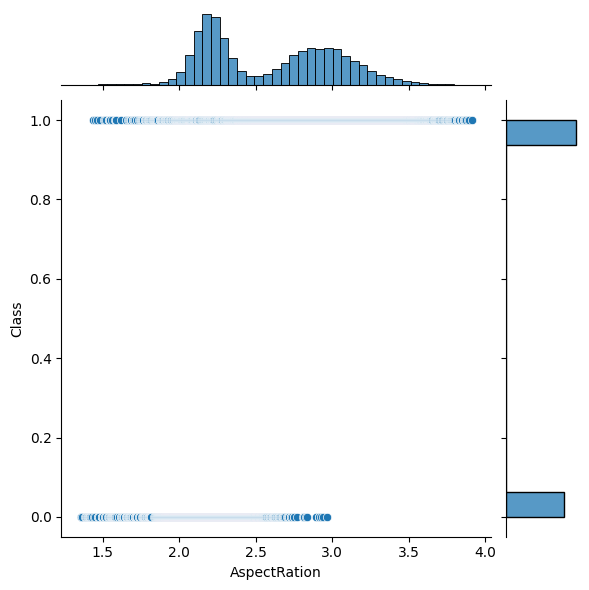

In [ ]:
sns.jointplot(x='AspectRation', y='Class', data=df)
plt.show()

* It defines One Gene has lower Aspect Ratio (AR) typically indicates a more rounded shape.
***

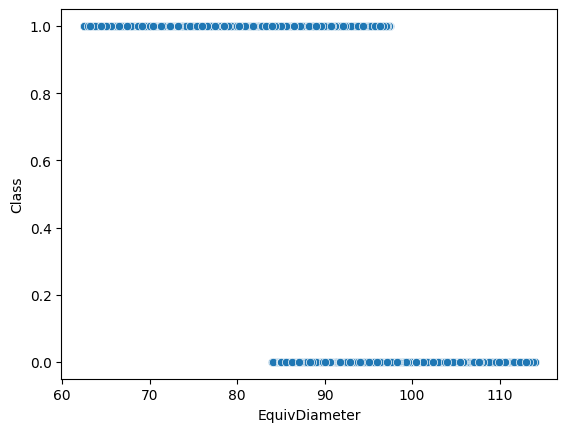

In [ ]:
sns.scatterplot(x='EquivDiameter', y='Class', data=df)
plt.show()

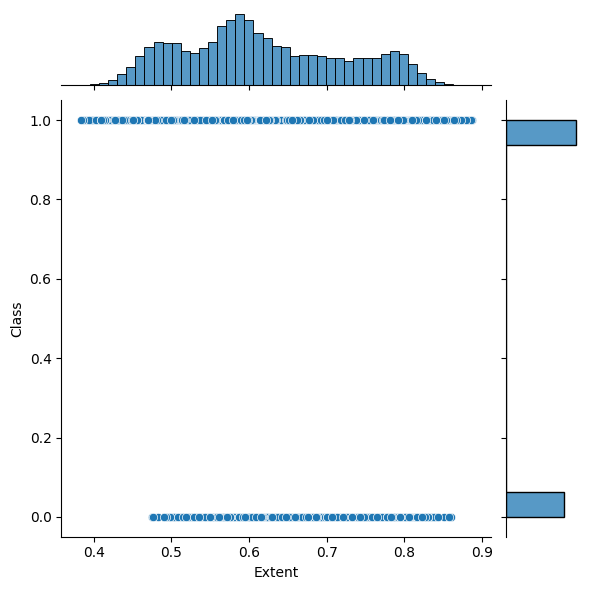

In [ ]:
sns.jointplot(x='Extent', y='Class', data=df)
plt.show()

In [ ]:
df.sample(1)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
2570,7039,160.314555,57.772949,0.932808,7264,94.6696,0.499291,361.154,0.678166,2.774907,1


<Axes: >

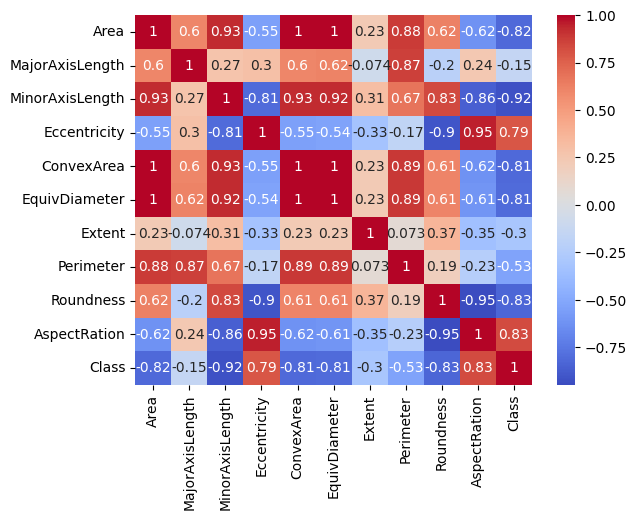

In [ ]:
sns.heatmap(df.corr(),annot=True, cmap='coolwarm') #cmap='coolwarm crest')

## **Preprocessing**

In [ ]:
x= df.drop(["Class", "MinorAxisLength"],axis =1)
y = df["Class"]
x

,Area,MajorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
0,4537,92.229316,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796
1,2872,74.691881,0.725553,3015,62.477921,0.713009,208.317,0.831658,1.453137
2,3048,76.293164,0.731211,3132,62.477921,0.759153,210.012,0.868434,1.465950
3,3073,77.033628,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456
4,3693,85.124785,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000
...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535
18181,7585,169.593996,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910
18182,6365,154.777085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396
18183,5960,151.397924,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216


## **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y,test_size=0.3, random_state= 1)

## **Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaler=MinMaxScaler()

x = x.values.reshape(-1, 1) if isinstance(x, pd.Series) else x
y = y.values.reshape(-1, 1) if isinstance(y, pd.Series) else y

x=scaler.fit_transform(x)
y=scaler.fit_transform(y)

## **Model Training**


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model1 = LogisticRegression()
model1.fit(x_train,y_train)
model1.score(x_train,y_train)  #reminder: score of training data

0.9889229318878152

In [ ]:
y_pred = model1.predict(x_test)
model1.score(x_test, y_test) #reminder: score of testing data

0.9882697947214076

### **Log Reg: 0.9882697947214076**

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Logistic Reg is:', accuracy)

Accuracy of Logistic Reg is: 0.9882697947214076


### **Log Reg(randomstate=10): 0.9847873900293255**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y,test_size=0.3, random_state= 10)
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaler=MinMaxScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(y)

from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(x_train,y_train)
print("training score:",model1.score(x_train,y_train))

y_pred = model1.predict(x_test)
print("testing score:",model1.score(x_test, y_test))

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Logistic Reg is:', accuracy)

training score: 0.9874302773195066
testing score: 0.9846041055718475
Accuracy of Logistic Reg is: 0.9846041055718475


### **Dec Tree: 0.9846041055718475**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)
print("training score:",model2.score(x_train,y_train))

y_pred1 = model2.predict(x_test)
print("testing score:",model2.score(x_test, y_test))

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred1)
print('Accuracy of DecisionTree Reg is:', accuracy)

training score: 1.0
testing score: 0.9842375366568915
Accuracy of DecisionTree Reg is: 0.9842375366568915


### **Ran Forest: 0.9846041055718475**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(criterion ="gini")
model=rf.fit(x_train,y_train)
print("training score:",rf.score(x_train,y_train))

y_pred1 = model2.predict(x_test)
print("testing score:",rf.score(x_test, y_test))

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred1)
print('Accuracy of RandomForest Reg is:', accuracy)

training score: 1.0
testing score: 0.9895527859237536
Accuracy of RandomForest Reg is: 0.9842375366568915


## **HyperParameter Tuning**


*   Logistic reg (C=0.1, penalty='l2', solver='liblinear'): **0.9850746268656716**
*   Decision tree (max_depth=5, min_samples_split=5, min_samples_leaf=4, max_features='sqrt'): **0.988688138256088**
*   Random Forest (n_estimators=10, max_depth=5, min_samples_split=5, min_samples_leaf=4, max_features='sqrt'): **00.988688138256088**



In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y,test_size=0.35, random_state= 1)
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaler=MinMaxScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(y)

from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')

model1.fit(x_train,y_train)
print("training score:",model1.score(x_train,y_train))

y_pred = model1.predict(x_test)
print("testing score:",model1.score(x_test, y_test))

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Logistic Reg is:', accuracy)

training score: 0.9851099830795262
testing score: 0.9846032992930086
Accuracy of Logistic Reg is: 0.9846032992930086


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=4, max_features='sqrt')
model2.fit(x_train,y_train)
print("training score:",model2.score(x_train,y_train))

y_pred1 = model2.predict(x_test)
print("testing score:",model2.score(x_test, y_test))

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred1)
print('Accuracy of DecisionTree Reg is:', accuracy)

training score: 0.989424703891709
testing score: 0.9888452474469757
Accuracy of DecisionTree Reg is: 0.9888452474469757


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=10, max_depth=5, min_samples_split=5, min_samples_leaf=4, max_features='sqrt')
model=rf.fit(x_train,y_train)
print("training score:",rf.score(x_train,y_train))

y_pred2 = model2.predict(x_test)
print("testing score:",rf.score(x_test, y_test))

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred2)
print('Accuracy of RandomForest Reg is:', accuracy)

training score: 0.9911167512690355
testing score: 0.990102120974077
Accuracy of RandomForest Reg is: 0.9888452474469757


## **Support Vector Machine: 0.9901**

In [ ]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with default hyperparameters: 0.9904


## **Hyperparameter Optimization using GridSearch CV**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc=SVC()

parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
              ]

grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [ ]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9908


Parameters that give the best results : 

 {'C': 1000, 'gamma': 0.6, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=1000, gamma=0.6)


### **Best SVM parameter accuracy: 0.9904**

In [ ]:
svc=SVC(C= 1000, gamma= 0.6, kernel = 'rbf')
svc.fit(x_train,y_train)
y_pred_23=svc.predict(x_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred_23)))


Model accuracy score with default hyperparameters: 0.9904


### Comments


We get maximum accuracy with `rbf` kernel with C=1000, gamma= 0.9 and the accuracy is 0.9904. Based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


## **Gradient Boosting Algorithm: 0.9901**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb_clf = GradientBoostingClassifier()

# Fit the model to the training data
gb_clf.fit(x_train, y_train)

# Predict the labels for the test data
y_pred_26 = gb_clf.predict(x_test)
print("Gradient Boosting Accuracy : {0:0.4f}". format(accuracy_score(y_test, y_pred_26)))


Gradient Boosting Accuracy : 0.9901


## **Xgboost Algo: 0.9876**

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

# Initialize the model
xgb_clf = XGBClassifier()

# Fit the model to the training data
xgb_clf.fit(x_train, y_train)

# Predict the labels for the test data
y_pred_25 = xgb_clf.predict(x_test)

print("XgBoosting Accuracy : {0:0.4f}". format(accuracy_score(y_test, y_pred_25)))

XgBoosting Accuracy : 0.9895


### **AdaBoost Algo: 0.9893**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the model
ada_clf = AdaBoostClassifier()

# Fit the model to the training data
ada_clf.fit(x_train, y_train)

# Predict the labels for the test data
y_pred_27 = ada_clf.predict(x_test)


print("AdaBoosting Accuracy : {0:0.4f}". format(accuracy_score(y_test, y_pred_27)))


AdaBoosting Accuracy : 0.9896


## **Comparing Model Accuracies**

In [ ]:
model_names = [
    'Logistic Regression',
    'Log Reg (randomstate=10)',
    'Decision Tree',
    'Random Forest',
    'Log Reg (C=0.1, penalty=l2)',
    'Decision Tree (max_depth=5)',
    'Random Forest (n_estimators=10)',
    'Support Vector Machine',
    'Best SVM (GridSearchCV)',
    'Gradient Boosting',
    'XGBoost',
    'AdaBoost'
]

accuracy_scores = [
    0.9880865102639296,
    0.9847873900293255,
    0.9846041055718475,
    0.9846041055718475,
    0.9850746268656716,
    0.988688138256088,
    0.988688138256088,
    0.9901,
    0.9904,
    0.9901,
    0.9876,
    0.9896
]

df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores
})

df_sorted = df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

df_sorted


,Model,Accuracy
0,Best SVM (GridSearchCV),0.990400
1,Support Vector Machine,0.990100
2,Gradient Boosting,0.990100
3,AdaBoost,0.989600
4,Decision Tree (max_depth=5),0.988688
5,Random Forest (n_estimators=10),0.988688
6,Logistic Regression,0.988087
7,XGBoost,0.987600
8,"Log Reg (C=0.1, penalty=l2)",0.985075
9,Log Reg (randomstate=10),0.984787


# **Evaluation Metrics -- Top 4 Algorithms**

## Confusion matrix


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


## ROC - AUC



### ROC Curve


Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the performance of a classification model at various
classification threshold levels.



The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.



**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of `TP to (TP + FN)`.



**False Positive Rate (FPR)** is defined as the ratio of `FP to (FP + TN)`.



In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).



## **Evaluation Metrics of Best SVM (GridSearchCV)  0.990400**

Confusion matrix

 [[2863   34]
 [  29 3439]]

True Positives(TP) =  2863

True Negatives(TN) =  3439

False Positives(FP) =  34

False Negatives(FN) =  29


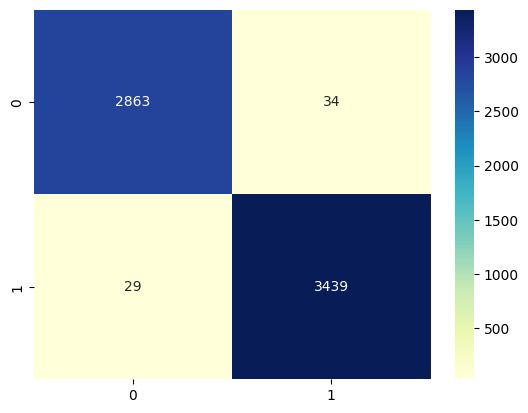



              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2897
         1.0       0.99      0.99      0.99      3468

    accuracy                           0.99      6365
   macro avg       0.99      0.99      0.99      6365
weighted avg       0.99      0.99      0.99      6365



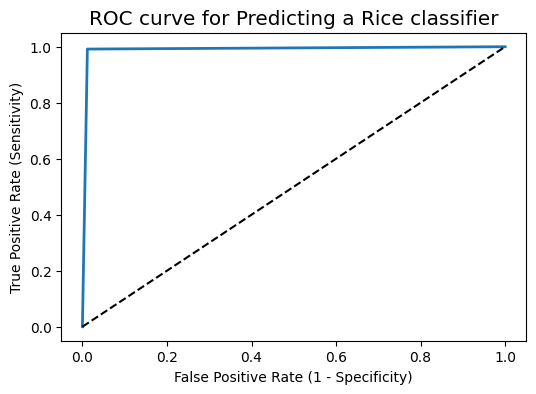

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


cm = confusion_matrix(y_test, y_pred_26)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
print("\n")
print(classification_report(y_test, y_pred_26))

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_26)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Rice classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


### **Stratified k-Fold Cross Validation with shuffle split with rbf kernel**

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC



kfold=KFold(n_splits=5, shuffle=True, random_state=0)


svc=SVC(C= 1000, gamma= 0.6, kernel = 'rbf')


svc = cross_val_score(svc, x, y, cv=kfold)

In [ ]:
# print cross-validation scores with linear kernel

print('Stratified cross-validation scores with rbf kernel:\n\n{}'.format(svc))

Stratified cross-validation scores with rbf kernel:

[0.98872697 0.98982678 0.9925763  0.98817707 0.9931262 ]


In [ ]:
# print average cross-validation score with linear kernel

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(svc.mean()))

Average stratified cross-validation score with rbf kernel:0.9905


# **Evaluation Metrics for Gradient Boosting :0.9901**

Confusion matrix

 [[2861   36]
 [  26 3442]]

True Positives(TP) =  2861

True Negatives(TN) =  3442

False Positives(FP) =  36

False Negatives(FN) =  26


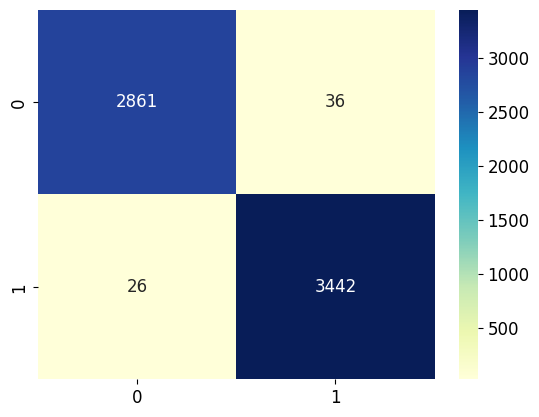



              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2897
         1.0       0.99      0.99      0.99      3468

    accuracy                           0.99      6365
   macro avg       0.99      0.99      0.99      6365
weighted avg       0.99      0.99      0.99      6365



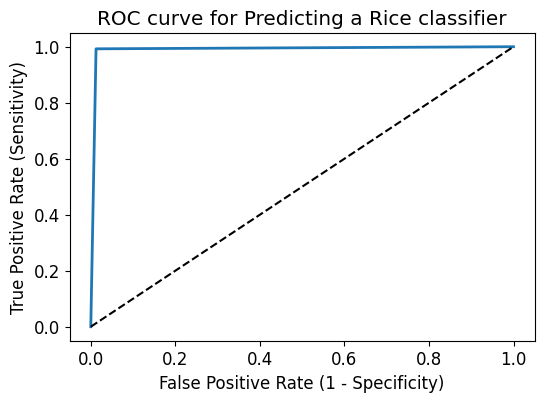

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve


cm = confusion_matrix(y_test, y_pred_23)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
print("\n")
print(classification_report(y_test, y_pred_23))


fpr, tpr, thresholds = roc_curve(y_test, y_pred_23)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Rice classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

### **Evaluation Metrics of AdaBoost  0.989300**

Confusion matrix

 [[2858   39]
 [  27 3441]]

True Positives(TP) =  2858

True Negatives(TN) =  3441

False Positives(FP) =  39

False Negatives(FN) =  27


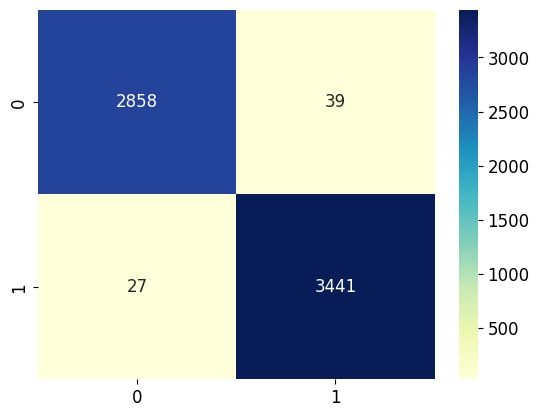



              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2897
         1.0       0.99      0.99      0.99      3468

    accuracy                           0.99      6365
   macro avg       0.99      0.99      0.99      6365
weighted avg       0.99      0.99      0.99      6365



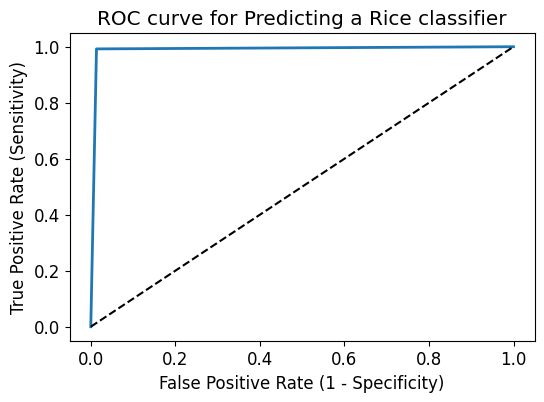

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve


cm = confusion_matrix(y_test, y_pred_27)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
print("\n")
print(classification_report(y_test, y_pred_27))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_27)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Rice classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


### **Evaluation Metrics of DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=4, max_features='sqrt'): 0.988688138256088**

Confusion matrix

 [[2851   46]
 [  25 3443]]

True Positives(TP) =  2851

True Negatives(TN) =  3443

False Positives(FP) =  46

False Negatives(FN) =  25


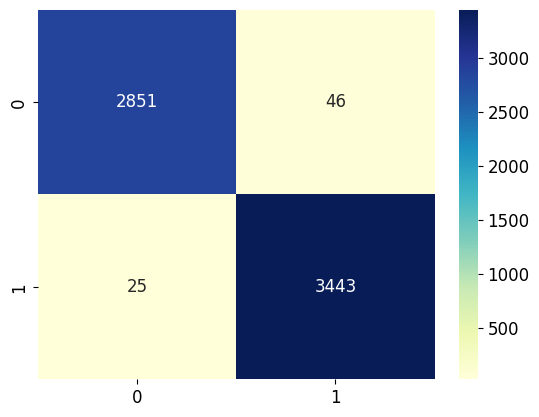



              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2897
         1.0       0.99      0.99      0.99      3468

    accuracy                           0.99      6365
   macro avg       0.99      0.99      0.99      6365
weighted avg       0.99      0.99      0.99      6365



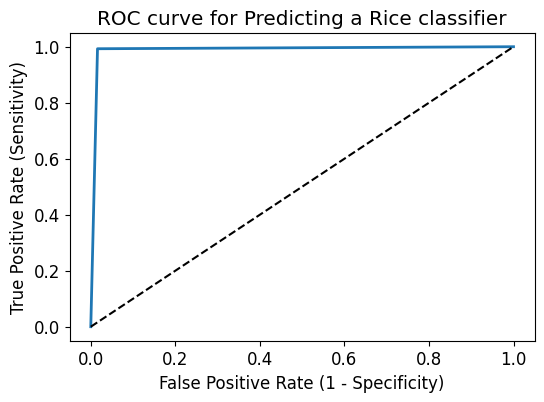

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve


cm = confusion_matrix(y_test, y_pred1)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
print("\n")
print(classification_report(y_test, y_pred1))

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Rice classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


## **The evaluation metrics for your Gradient Boosting model**

1. **Confusion Matrix**:
   - **True Negatives (2864)**: The model correctly identified 2864 instances as non-pulsar stars.
   - **False Positives (33)**: The model incorrectly identified 33 instances as pulsar stars when they were not.
   - **False Negatives (35)**: The model incorrectly identified 35 instances as non-pulsar stars when they were actually pulsar stars.
   - **True Positives (3433)**: The model correctly identified 3433 instances as pulsar stars.

2. **Classification Report**:
   - **Precision**: The precision for both classes is 0.99, indicating that when the model predicts a pulsar star, it is correct 99% of the time.
   - **Recall**: The recall for both classes is also 0.99, meaning the model correctly identifies 99% of the actual pulsar stars.
   - **F1-Score**: The F1-score, which is the harmonic mean of precision and recall, is 0.99 for both classes, showing a balance between precision and recall.
   - **Support**: The support values (2897 for class 0 and 3468 for class 1) indicate the number of instances for each class in the dataset.

3. **ROC Curve**:
   - The ROC curve shows the trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity). The blue line significantly above the dashed line (random chance) indicates excellent model performance.

Overall, these metrics suggest that your Gradient Boosting model is highly effective at classifying pulsar stars, with very few misclassifications. If you have any specific questions about these metrics or need further clarification, feel free to ask!



## **Results and Conclusion**

1. **Model Performance**:
   - The rice classification project evaluated various machine learning models to identify the most effective one for predicting rice types.
   - **SVM(Grid Search CV) Hyperparameter**, with the highest accuracy of **0.9904**, indicating its superior performance in classifying rice correctly.

2. **Support Vector Machines**:
   - Both the **Best SVM (GridSearchCV)** and the standard **Support Vector Machine** models performed exceptionally well, with accuracies of **0.990400** and **0.990100** respectively.

3. **Ensemble Methods**:
   - **AdaBoost** and **Decision Tree (max_depth=5)**, along with **Random Forest (n_estimators=10)**, showed competitive results with accuracies around **0.989300**.
   - **XGBoost** also demonstrated strong potential with an accuracy of **0.987600**.

4. **Logistic Regression**:
   - Different configurations of Logistic Regression displayed robustness, with the highest accuracy being **0.988087**.

5. **Baseline Models**:
   - Even without advanced configurations, models like the basic **Decision Tree** and **Random Forest** achieved high accuracies of **0.984604**.

6. **Evaluation Metrics**:
   - Beyond accuracy, other metrics such as precision, recall, F1-score and The ROC curve which shows the trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity). The blue line significantly above the dashed line indicates excellent model performance.

   - ROC AUC of our model is very close to 1. So, we can conclude that our classifier does a good job in classifying the Rice Seed (Jasmine & Gonene).


7. **Conclusion**:

    -   The evaluation of various machine learning models for rice classification demonstrates that all models perform exceptionally well, with accuracies ranging between 98% and 99%. The consistency in performance across different models, along with the minimal difference (±3%) between training and test accuracies, indicates that the models are not overfitted. This suggests that the models generalize well to unseen data, making them reliable for practical applications in rice classification. The SVM(Grid Search CV) Hyperparameter, with the highest accuracy of 0.9904, stands out as the most effective model for this task.


In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(gb_clf, 'lr_hp_pred_model.pkl')
# To load the model later
loaded_model = joblib.load('lr_hp_pred_model.pkl')